# Numpy (5 points)

In [ ]:
import numpy as np

## Task 1 (1 point)



Create function `find_index_closest` that find the index of the closest elements with the same index. If there are several indices, return the first one.


In [ ]:
def find_index_closest(array1, array2):
    distance = np.abs(array1 - array2)
    return np.argmin(distance)

In [ ]:
#Cell for testing
#Do not change this cell
np.random.seed(0)


a1 = np.array([1, 2, 3])
b1 = np.array([100, 55, 78])
'''
For index 0 - the distance is 99
For index 1 - the distance is 53
For index 2 - the distance is 75

So, the function should return 1
'''
assert find_index_closest(a1, b1) == 1



a1 = np.array([1, 2, 3])
b1 = np.array([1, 2, 78])
assert find_index_closest(a1, b1) == 0

assert find_index_closest(np.random.rand(5), np.random.rand(5)) == 4
assert find_index_closest(np.random.rand(5), np.random.rand(5)) == 3
assert find_index_closest(np.random.rand(5), np.random.rand(5)) == 3
assert find_index_closest(np.random.rand(1000), np.random.rand(1000)) == 205

## Task 2 (1 point)




Create function `prod_no_zeros` that computes the product of non-zero elements.


In [ ]:
def prod_no_zeros(matrix):
  return np.prod(matrix[matrix != 0])

In [ ]:
#Cell for testing
#Do not change this cell
np.random.seed(0)
a2 = np.array([[1, 0, 3, 0, 5],
               [0, 0, 2, 4, 0]])
'''
The product is - 1 * 3 * 5 * 2 * 4 = 120
'''
assert prod_no_zeros(a2) == 120

assert np.allclose(prod_no_zeros(np.ones((4, 5))), 1.0)

r = np.random.rand(3, 4)
r[np.random.randint(3, size=2), np.random.randint(4, size=2)] = 0.0
assert np.allclose(prod_no_zeros(r), 0.004610776903132477)

r = np.random.rand(3, 4)
r[np.random.randint(3, size=10), np.random.randint(4, size=10)] = 0.0
assert np.allclose(prod_no_zeros(r), 0.06700531187530212)

r = np.random.rand(3, 4, 5) * 5
r[np.random.randint(3, size=10), np.random.randint(4, size=10), np.random.randint(5, size=10)] = 0.0
assert np.allclose(prod_no_zeros(r), 294641039.92862517)

## Task 3 (1 point)


Create function `sum_antidiagonal_even` that computes the sum of elements on anti-diagonal (secondary diagonall, that goes from top right to bottom left).

In [ ]:
def sum_antidiagonal_even(matrix):
    matrix = np.array(matrix)
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Input must be a non-empty square matrix.")

    anti_diagonal = matrix[np.arange(matrix.shape[0]), matrix.shape[1] - 1 - np.arange(matrix.shape[0])]
    return np.sum(anti_diagonal[anti_diagonal % 2 == 0])


In [ ]:
#Cell for testing
#Do not change this cell
np.random.seed(0)

a = np.array([[1, 2, 3],
              [3, 4, 5],
              [6, 7, 8]])
'''
Element on anti-diagonal  are 3, 4, 6
The sum of even - 4 + 6 = 10
'''
assert sum_antidiagonal_even(a) == 10

a = np.array([[1, 2, 3],
              [3, -5, 5],
              [5, 7, 8]])
assert sum_antidiagonal_even(a) == 0

a = np.array([[1, 2],
              [3, 5]])
assert sum_antidiagonal_even(a) == 2

assert sum_antidiagonal_even(np.random.randint(-10, 10, (10, 10))) == -36
assert sum_antidiagonal_even(np.random.randint(-10, 10, (10, 10))) == 4
assert sum_antidiagonal_even(np.random.randint(-10, 10, (10, 10))) == -10

## Task 4 (2 points)

A matrix `product_customer` contains the expenses of the customers (columns) on the products (rows).

Create a function `ratio_product` that computes the share of expense the product `i` for every customer.


If the buyer did not spend anything at all, then the share should be 0.



In [23]:
def ratio_product(product_customer, i):
    i_sum = np.sum(product_customer, axis=0)
    exp_with_0 = np.where(i_sum == 0, 1, i_sum)
    share = product_customer[i] / exp_with_0
    share[i_sum == 0] = 0
    return share

In [ ]:
#Cell for testing
#Do not change this cell
np.random.seed(0)

#2 products, 3 customers
r = np.array([[1, 2, 3],
                             [4, 5, 6]])
'''
The first consumer spend in total 1 + 4 = 5, so the share of the product 0 is 1/4 = 0.2
The second consumer spend in total 2 + 5 = 7, so the share of the product 0 is 2/7 = 0.28571429
The third consumer spend in total 3 + 6 = 9, so the share of the product 0 is 3/9 = 0.33333333
'''
assert np.allclose(ratio_product(r, 0), np.array([0.2, 0.28571429, 0.33333333]))


r = np.random.rand(4, 3)

assert np.allclose(ratio_product(r, 0), np.array([0.28662778, 0.25340278, 0.21988911]))
assert np.allclose(ratio_product(r, 1), np.array([0.2845751 , 0.15010752, 0.23562328]))
assert np.allclose(ratio_product(r, 2), np.array([0.22853784, 0.31596913, 0.35154583]))
assert np.allclose(ratio_product(r, 3), np.array([0.20025927, 0.28052057, 0.19294177]))


r = np.random.rand(3, 4)
r[:,1] = 0.0

assert np.allclose(ratio_product(r, 0), np.array([0.36253197, 0.0, 0.05419819, 0.05014144]))
assert np.allclose(ratio_product(r, 1), np.array([0.01290359, 0.0, 0.59370815, 0.50067725]))
assert np.allclose(ratio_product(r, 2), np.array([[0.62456444, 0.0, 0.35209366, 0.44918132]]))

<ipython-input-18-546be4b4930e>:4: RuntimeWarning: invalid value encountered in divide
  return np.where(total_expenses > 0, product_customer[i] / total_expenses, 0)


# Matplotlib (5 points)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

**Task 1** (5 points)

Create the plot as close as possible to the following one:

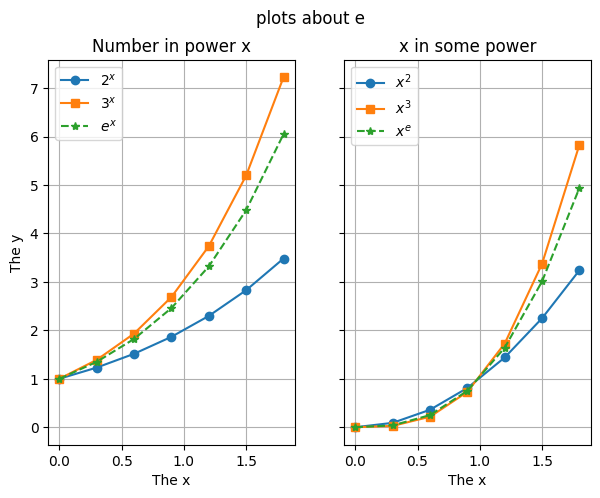

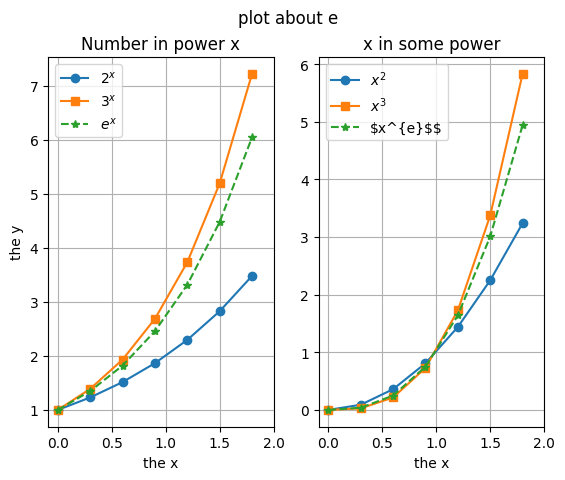

In [30]:
x = np.arange(0, 2, 0.3)
x_values = np.arange(0, 2, 0.3)

y_exp2 = 2 ** x_values
y_exp3 = 3 ** x_values
y_exp_e = np.exp(x_values)

y_square = x_values ** 2
y_cube = x_values ** 3
y_exp_x = x_values ** np.e

figure, (subplot1, subplot2) = plt.subplots(1, 2)
figure.suptitle('plot about e')

# first subplot
subplot1.grid()
subplot1.plot(x_values, y_exp2, 'o-', label=r"$2^x$")
subplot1.plot(x_values, y_exp3, 's-', label=r"$3^x$")
subplot1.plot(x_values, y_exp_e, '*--', label=r"$e^x$")
subplot1.legend(loc='best')
subplot1.set_title("Number in power x")
subplot1.set_ylabel("the y")
subplot1.set_xlabel("the x")
subplot1.set_xlim(right=2)

# Second subplot
subplot2.grid()
subplot2.plot(x_values, y_square, 'o-', label=r"$x^2$")
subplot2.plot(x_values, y_cube, 's-', label=r"$x^3$")
subplot2.plot(x_values, y_exp_x, '*--', label=r"$x^{e}$$")
subplot2.legend(loc='best')
subplot2.set_title("x in some power")
subplot2.set_xlabel("the x")
subplot2.set_xlim(right=2)

plt.show()